In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = '/home/tbrownex/data/Hackett/JLP/UseCase1/salesForecast/'
FILE = 'store_sales_by_OLG-pre.csv'

STORES = ["Twickenham", "Thame", "Wokingham", "Harrogate", "Chandlers Ford",\
          "Sidmouth", "Barry", "Banstead", "Westbury Park", "Monmouth"]

In [22]:
def smooth(x, window_len, window='hanning'):
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(), s, mode='valid')
    return y

In [23]:
df = pd.read_csv(PATH+FILE)

store = "Banstead"
sales    = df.loc[df["Business Unit Long Name"]==store]["Line Sales £"]
sales    = sales.reset_index(drop=True)

smoothed = smooth(sales, window_len=5)
print("Smoothed STD % of original: {:.2f}".format(smoothed.std()/sales.std()))

In [ ]:
s=np.r_[sales[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]

In [57]:
np.hanning(11)

array([0.       , 0.0954915, 0.3454915, 0.6545085, 0.9045085, 1.       ,
       0.9045085, 0.6545085, 0.3454915, 0.0954915, 0.       ])

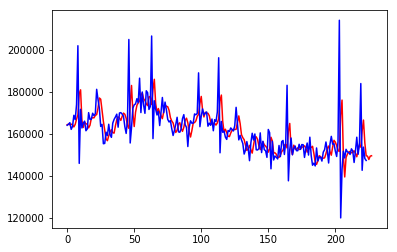

In [28]:
plt.plot(smoothed, color="r")
plt.plot(sales, color="b")
plt.show()